# HW01: Intro to Text Data

In [ ]:
%%capture
!pip install plox
!pip install tabulate

In [ ]:
!date

Mon 22 Feb 2021 08:03:12 PM UTC


In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [ ]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2021-02-22 20:03:13--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  28.10M  --.-KB/s    in 0.1s    

2021-02-22 20:03:13 (235 MB/s) - ‘train.csv.1’ saved [29470338/29470338]



## Inspect Data

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [ ]:
df.columns = ["label", "title", "lead"]
label_map = {1: "world", 2: "sport", 3: "business", 4: "sci/tech"}
df["label"] = df["label"].apply(label_map.get) 

In [ ]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
# a new column `text` which contains the lowercased `title` and `lead`
df["text"] = (df.title + " " + df.lead).str.lower()
print(df.text[0])

wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.


In [ ]:
# print the number of documents for each label
df.label.groupby(df.label).count()

label
business    30000
sci/tech    30000
sport       30000
world       30000
Name: label, dtype: int64

## Document Length

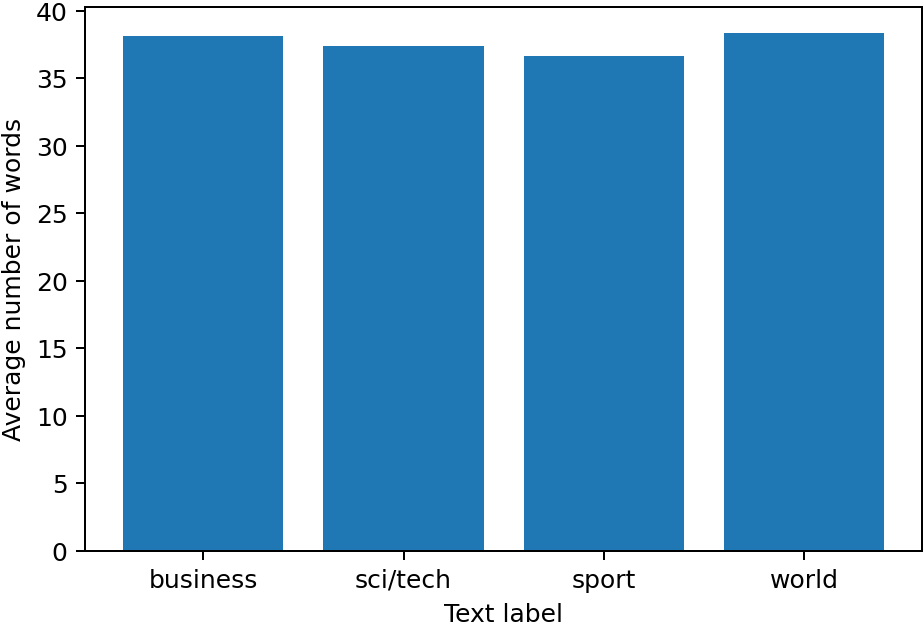

In [ ]:
# create a new column with the number of words for each text
# plot the average number of words per label 

import re
from plox import Plox

def words(text: str):
    return list(filter(len, re.findall("([a-z][a-z'-]*)", str.lower(text))))

df['nwords'] = df.text.apply(lambda text: len(words(text)))

avg_nwords = df.groupby(by='label').nwords.mean()

with Plox() as px:
    px.a.bar(x=avg_nwords.index, height=avg_nwords)
    px.a.set_ylabel("Average number of words")
    px.a.set_xlabel("Text label")
    px.show()

## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") appear in the different classes in our data

In [ ]:
from collections import Counter

keywords = ["play", "tax", "blackberry", "israel"]

counts = pd.DataFrame(
    data={
        keyword: 
            df.text.apply(
                lambda text: Counter(words(text))[keyword]
            ).groupby(df.label).sum()
        for keyword in keywords
    },
)

counts['total'] = counts.T.sum(axis=1)

print(counts.to_markdown())

| label    |   play |   tax |   blackberry |   israel |   total |
|:---------|-------:|------:|-------------:|---------:|--------:|
| business |     72 |   834 |           43 |       15 |     nan |
| sci/tech |    212 |    49 |          181 |       24 |     nan |
| sport    |   1354 |     9 |            0 |       32 |     nan |
| world    |     77 |   144 |            0 |     1243 |     nan |


As a last exercise, let's plot the number of occurrences of "tax" in the different classes in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

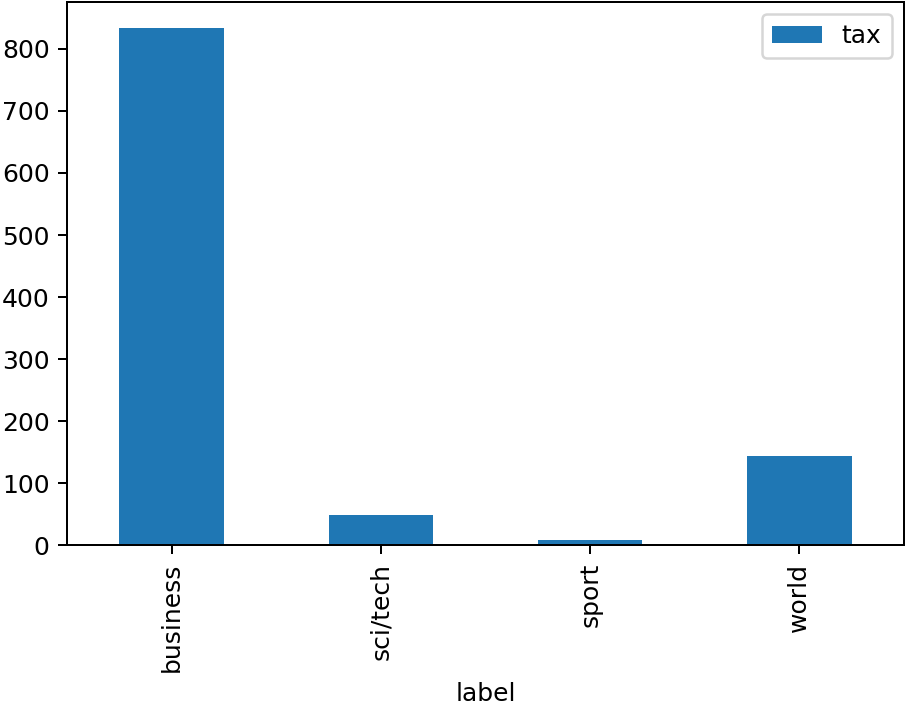

In [ ]:
with Plox() as px:
    counts.plot(kind='bar', y='tax', ax=px.a)
    px.show()